In [21]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [22]:
iris = pd.read_csv("Iris.csv") 

In [23]:
iris.head(2)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa


In [24]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [40]:
  
from sklearn.cross_validation import train_test_split 

from sklearn import svm 
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB  
from sklearn.preprocessing import LabelEncoder

In [41]:
train, test = train_test_split(iris, test_size = 0.3)

In [42]:
train_X = train[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
train_y=train.Species
test_X= test[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']] 
test_y =test.Species   

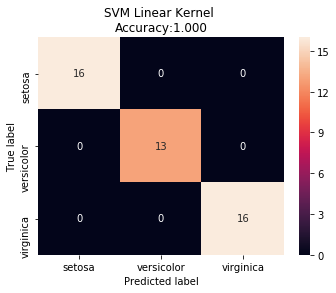

In [45]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, precision_recall_fscore_support

clf = SVC(kernel = 'linear').fit(train_X,train_y)
clf.predict(train_X)
y_pred = clf.predict(test_X)


cm = confusion_matrix(test_y, y_pred) 

cm_df = pd.DataFrame(cm,
                     index = ['setosa','versicolor','virginica'], 
                     columns = ['setosa','versicolor','virginica'])

plt.figure(figsize=(5.5,4))
sns.heatmap(cm_df, annot=True)
plt.title('SVM Linear Kernel \nAccuracy:{0:.3f}'.format(accuracy_score(test_y, y_pred)))
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [28]:
model = svm.SVC() 
model.fit(train_X,train_y) 
prediction=model.predict(test_X) 
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))


The accuracy of the SVM is: 0.9777777777777777


# Gaussian naive Bayes 

In [35]:
le = LabelEncoder()
le.fit(iris['Species'])
iris['Species'] = le.transform(iris['Species'])


trainSet, testSet = train_test_split(iris, test_size = 0.33)
print(trainSet.shape)
print(testSet.shape)
print(trainSet.head(3))

(100, 6)
(50, 6)
    Id  SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm  Species
18  19            5.7           3.8            1.7           0.3        0
73  74            6.1           2.8            4.7           1.2        1
37  38            4.9           3.1            1.5           0.1        0


In [36]:

trainData = pd.DataFrame.as_matrix(trainSet[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
trainTarget = pd.DataFrame.as_matrix(trainSet[['Species']]).ravel()
testData = pd.DataFrame.as_matrix(testSet[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
testTarget = pd.DataFrame.as_matrix(testSet[['Species']]).ravel()

classifier = GaussianNB()
classifier.fit(trainData, trainTarget)

/home/h4xor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/home/h4xor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/h4xor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
/home/h4xor/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """


GaussianNB(priors=None)

In [37]:
predictedValues = classifier.predict(testData)

nErrors = (testTarget != predictedValues).sum()
accuracy = 1.0 - nErrors / testTarget.shape[0]
print("Accuracy: ", accuracy)

Accuracy:  0.96
